<center> <h1> <FONT FACE="Times new roman">Modelado de densidad para mezclas binarias de hidrocarburos</FONT> </h1> </center


**Autor**: German Eduaro Hernández Rivera

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from thermo import Mixture,Chemical,unifac,PRMIXTranslatedPPJP
from thermo import ChemicalConstantsPackage
from thermo.interaction_parameters import IPDB

In [2]:
#CICLOHEXANO
DATA_CH=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="TABLA CH")
S_PURACH=DATA_CH[1:18]
MIX_C1CH=DATA_CH[19:36] #0.1503 m
MIX_C2CH=DATA_CH[37:54] #0.2277 m
MIX_C3CH=DATA_CH[55:72] #0.3044 m
DATA_CH.head()

,T,rho,u,ks,nD,Rm,visc,Vm,ksm
0,Ciclohexano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298.15,0.77397,1255.60,819.545856,1.423466,27.71617,0.8947,108.73742,0.891153
2,300.65,0.77160,1243.20,838.543850,1.422068,27.72067,0.8564,109.07141,0.914612
3,303.15,0.76923,1230.89,858.035585,1.420658,27.72493,0.8233,109.40746,0.938755
4,305.65,0.76685,1218.65,878.074960,1.419251,27.72942,0.7906,109.74702,0.963661


In [3]:
DATA_MV=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="MIXVIS")
DATA_MV[1:5]["x1"].to_numpy(dtype="float64") #Ciclohexano-DBT

array([0.0125, 0.0188, 0.025 , 1.    ])

In [4]:
#TOLUENO
DATA_T=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="TABLA T")
S_PURAT=DATA_T[1:18]
MIX_C1T=DATA_T[19:36] #0.1503 m
MIX_C2T=DATA_T[37:54] #0.2277 m
MIX_C3T=DATA_T[55:72] #0.3044 m
DATA_T.head()

,T,rho,u,ks,nD,Rm,visc,Vm,ksm
0,Tolueno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298.15,0.862309,1306.34,679.554241,1.493962,31.104478,0.5552,106.85067,0.726108
2,300.65,0.859973,1295.46,692.897004,1.492539,31.112764,0.5400,107.14141,0.742380
3,303.15,0.857635,1284.63,706.543413,1.491085,31.118982,0.5245,107.43249,0.759057
4,305.65,0.855295,1273.86,720.506871,1.489645,31.126269,0.5096,107.72641,0.776176


In [5]:
#BENCENO
DATA_B=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="TABLA B")
S_PURAB=DATA_B[1:18]
MIX_C1B=DATA_B[19:36] #0.1503 m
MIX_C2B=DATA_B[37:54] #0.2277 m
MIX_C3B=DATA_B[55:72] #0.3044 m
DATA_B.head()

,T,rho,u,ks,nD,Rm,visc,Vm,ksm
0,Benceno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298.15,0.87370,1301.46,675.734379,1.497432,26.180629,0.6072,89.40346,0.604130
2,300.65,0.87102,1289.67,690.263132,1.495788,26.187536,0.5851,89.67854,0.619018
3,303.15,0.86834,1277.98,705.118449,1.494156,26.194937,0.5652,89.95532,0.634292
4,305.65,0.86566,1265.99,720.762361,1.492496,26.201026,0.5463,90.23381,0.650371


In [6]:
#OCTANO
DATA_O=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="TABLA O")
S_PURAO=DATA_O[1:18]
MIX_C1O=DATA_O[19:36] #0.1503 m
MIX_C2O=DATA_O[37:54] #0.2277 m
MIX_C3O=DATA_O[55:72] #0.3044 m
DATA_O.head()

,T,rho,u,ks,nD,Rm,visc,Vm,ksm
0,Octano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298.15,0.69872,1173.93,1038.514161,1.395257,39.216085,0.5129,163.48251,1.697789
2,300.65,0.69671,1163.55,1060.175723,1.394076,39.225117,0.4982,163.95416,1.738202
3,303.15,0.69469,1153.19,1082.448436,1.392876,39.232998,0.4834,164.43090,1.779880
4,305.65,0.69266,1142.89,1105.276728,1.391643,39.238469,0.4699,164.91280,1.822743


In [7]:
"""DBT_PURE=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DBT DATA ASPEN PLUS.xlsx",sheet_name="RHO")
DBT_PURE"""

'DBT_PURE=pd.read_excel(r"D:\\Escritorio\\TRABAJO DE GRADO\\DBT DATA ASPEN PLUS.xlsx",sheet_name="RHO")\nDBT_PURE'

In [8]:
#Rho_DBT=RHO_DBT(DATA_CH["T"][55:72].to_numpy(dtype="float64"))/1000 
DBT_RPURE=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DBT DATA ASPEN PLUS.xlsx",sheet_name="EVALASPENRHO")
DBT_RPURE.head()

,T,Density (Liquid vs. Gas ) (kg/cum),rho
0,298.15,1202.2,1.2022
1,300.65,1200.4,1.2004
2,303.15,1198.6,1.1986
3,305.65,1196.8,1.1968
4,308.15,1195.0,1.1950


In [9]:
#Crear una lista de datasets y otra con los nombres para pasarlos por un for en los plots
rho_puros=["Nada",DATA_CH[1:18]["rho"].values,DATA_T[1:18]["rho"].values,DATA_B[1:18]["rho"].values,DATA_O[1:18]["rho"].values,
          DATA_CH[1:18]["rho"].values,DATA_T[1:18]["rho"].values,DATA_B[1:18]["rho"].values,DATA_O[1:18]["rho"].values,
          DATA_CH[1:18]["rho"].values,DATA_T[1:18]["rho"].values,DATA_B[1:18]["rho"].values,DATA_O[1:18]["rho"].values]
PMS=["Nada",84.16,92.14,78.11,114.23,
     84.16,92.14,78.11,114.23,
     84.16,92.14,78.11,114.23] #Pesos moleculares en orden [ciclohexano,tolueno,benceno,octano]
XS=[0.0125,0.0188,0.025]
COMPONENTS=[["Nada"],["132-65-0","110-82-7"],["132-65-0","108-88-3"],["132-65-0","71-43-2"],["132-65-0","111-65-9"],
                     ["132-65-0","110-82-7"],["132-65-0","108-88-3"],["132-65-0","71-43-2"],["132-65-0","111-65-9"],
                     ["132-65-0","110-82-7"],["132-65-0","108-88-3"],["132-65-0","71-43-2"],["132-65-0","111-65-9"]]

In [10]:
DF_MIXTURES=pd.DataFrame({"T[K]":MIX_C1CH["T"].values,"MIX_C1CH":MIX_C1CH["rho"].values,"MIX_C1T":MIX_C1T["rho"].values,"MIX_C1B":MIX_C1B["rho"].values,"MIX_C1O":MIX_C1O["rho"].values,
                             "MIX_C2CH":MIX_C2CH["rho"].values,"MIX_C2T":MIX_C2T["rho"].values,"MIX_C2B":MIX_C2B["rho"].values,"MIX_C2O":MIX_C2O["rho"].values,
                              "MIX_C3CH":MIX_C3CH["rho"].values,"MIX_C3T":MIX_C3T["rho"].values,"MIX_C3B":MIX_C3B["rho"].values,"MIX_C3O":MIX_C3O["rho"].values})
DF_MIXTURES.head()
#DF_MIXTURES.iloc[:,1]

,T[K],MIX_C1CH,MIX_C1T,MIX_C1B,MIX_C1O,MIX_C2CH,MIX_C2T,MIX_C2B,MIX_C2O,MIX_C3CH,MIX_C3T,MIX_C3B,MIX_C3O
0,298.15,0.78164,0.86890,0.88129,0.705375,0.78571,0.872193,0.885190,0.708580,0.78928,0.87527,0.88865,0.711986
1,300.65,0.77928,0.86656,0.87863,0.703345,0.78335,0.869868,0.882534,0.706546,0.78693,0.87295,0.88600,0.709949
2,303.15,0.77692,0.86423,0.87596,0.701310,0.78099,0.867538,0.879875,0.704511,0.78457,0.87064,0.88334,0.707900
3,305.65,0.77455,0.86190,0.87329,0.699271,0.77862,0.865206,0.877217,0.702472,0.78221,0.86832,0.88068,0.705847
4,308.15,0.77218,0.85955,0.87062,0.697228,0.77626,0.862870,0.874553,0.700427,0.77984,0.86600,0.87802,0.703788


In [11]:
DF_MIXTURES.columns.values

array(['T[K]', 'MIX_C1CH', 'MIX_C1T', 'MIX_C1B', 'MIX_C1O', 'MIX_C2CH',
       'MIX_C2T', 'MIX_C2B', 'MIX_C2O', 'MIX_C3CH', 'MIX_C3T', 'MIX_C3B',
       'MIX_C3O'], dtype=object)

In [12]:
# i=1 j=1 k=1
# i=2 j=2 k=2
def OP_NRTL_CH(v_0,T,rho_exp,x1,PM2,rho2):
    a12=v_0[0] ; a21=v_0[1] ; b12=v_0[2] ; b21=v_0[3] ; alpha12=v_0[4] ; alpha21=v_0[5]
    R=8.314
    x2=1-x1
    #rho1=Rho_DBT
    rho1=DBT_RPURE["rho"]
    #rho2=DATA_CH[1:18]["rho"].to_numpy(dtype=float)
    PM1=184.26  #PM2=84.16
    tao_21=a21+(b21/T)
    tao_12=a12+(b12/T)
    G21=np.exp(-alpha21*tao_21)
    G12=np.exp(-alpha12*tao_12)
    NUM=(tao_12*G12*x1)+(tao_21*G21*x2)
    DEN=x1+x2+G12*x1+G21*x2
    VE=R*T*x1*(NUM/DEN)+x2*(NUM/DEN)
    rho_teo=((x1*PM1)+(x2*PM2))/(VE+((x1*PM1/rho1)+((x2*PM1/rho2))))
    SSRES=np.zeros(len(rho_exp))
    for i in range(0,len(rho_exp)):
        SSRES[i]=((rho_teo[i]-rho_exp[i])**2)#/(rho_teo[i]*rho_exp[i])
    f=np.sum(SSRES)    
    return f
#OP_NRTL_CH([-0.0565,0.0575,-0.3610,-0.04512,0.2,0.2])

def fun_NRTL(v_0,T,x1,PM2,rho2):
    a12=v_0[0] ; a21=v_0[1] ; b12=v_0[2] ; b21=v_0[3] ; alpha12=v_0[4] ; alpha21=v_0[5]
    R=8.314
    x2=1-x1
    #rho1=Rho_DBT
    rho1=DBT_RPURE["rho"]
    #rho2=DATA_CH[1:18]["rho"].to_numpy(dtype=float)
    PM1=184.26  #PM2=84.16
    tao_21=a21+(b21/T)
    tao_12=a12+(b12/T)
    G21=np.exp(-alpha21*tao_21)
    G12=np.exp(-alpha12*tao_12)
    NUM=(tao_12*G12*x1)+(tao_21*G21*x2)
    DEN=x1+x2+G12*x1+G21*x2
    VE=R*T*x1*(NUM/DEN)+x2*(NUM/DEN)
    rho_teo=((x1*PM1)+(x2*PM2))/(VE+((x1*PM1/rho1)+((x2*PM1/rho2))))
    return rho_teo

In [13]:
#Renlich-Kister
def OP_RKIS_CH(v_1,T,rho_exp,x1,PM2,rho2):
    a1=v_1[0] ; a2=v_1[1] ; b1=v_1[2] ;b2=v_1[2] 
    x2=1-x1
    #rho1=Rho_DBT
    rho1=DBT_RPURE["rho"]
    #rho2=DATA_CH[1:18]["rho"].to_numpy(dtype=float)
    PM1=184.26  #PM2=84.16
    A1=a1+b1*T
    A2=a2+b2*T    
    VE=x1*x2*((A1*(x1-x2))+(A2*((x1-x2)**2)))
    rho_teo=((x1*PM1)+(x2*PM2))/(VE+((x1*PM1/rho1)+((x2*PM1/rho2))))
    SSRES=np.zeros(len(rho_exp))
    for i in range(0,len(rho_exp)):
        SSRES[i]=((rho_teo[i]-rho_exp[i])**2)#/(rho_teo[i]*rho_exp[i])
    f=np.sum(SSRES)    
    return f
def fun_RKIS_CH(v_1,T,x1,PM2,rho2):
    a1=v_1[0] ; a2=v_1[1] ; b1=v_1[2] ;b2=v_1[2] 
    x2=1-x1
    #rho1=Rho_DBT
    rho1=DBT_RPURE["rho"]
    #rho2=DATA_CH[1:18]["rho"].to_numpy(dtype=float)
    PM1=184.26  #PM2=84.16
    A1=a1+b1*T
    A2=a2+b2*T    
    VE=x1*x2*((A1*(x1-x2))+(A2*((x1-x2)**2)))
    rho_teo=((x1*PM1)+(x2*PM2))/(VE+((x1*PM1/rho1)+((x2*PM1/rho2))))
    return rho_teo

In [14]:

def TRIDEN(v_2,T,rho_exp):
    P=0.101325 #MPa
    P0=0.101325 #MPa
    AR=v_2[0] ; BR=v_2[1] ; CR=v_2[2] ; CT=v_2[3]; DR=v_2[4] ;ET=v_2[5] 
    b0=v_2[6] ; b1=v_2[7] ; b2=v_2[8] ;b3=v_2[9]
    #T=MIX_C1CH["T"].to_numpy(dtype=float)
    #rho_exp=MIX_C1CH["rho"].to_numpy(dtype=float)
    #Rackett mod model
    rho_0=AR/(BR**(1+((1-(T/CR)*DR))))
    #Tait model
    BT=b0 + b1*(T/ET)+ b2*(T/ET)**2+ b3*(T/ET)**3     
    rho_teo=rho_0/(1-CT*np.log((BT+P)/(BT+P0)))
    SSRES=np.zeros(len(rho_exp))
    for i in range(0,len(rho_exp)):
        SSRES[i]=((rho_teo[i]-rho_exp[i])**2)#/(rho_teo[i]*rho_exp[i])
    f=np.sum(SSRES)   
    return f
#TRIDEN([0.022477, 0.16007, 532.92326, 0.09142,0.21153, 96.91, 169.20366,11.8645, -29.14744, 4.2399])
#minimize(TRIDEN,[0.022477, 0.16007, 532.92326, 0.09142,0.21153, 
                 #96.91, 169.20366,11.8645, -29.14744, 4.2399],args=(MIX_C1CH["T"].to_numpy(dtype=float),MIX_C1CH["rho"].to_numpy(dtype=float)),method="Nelder-Mead").x
def fun_TRIDEN(v_2,T):
    P=0.101325 #MPa
    P0=0.101325 #MPa
    AR=v_2[0] ; BR=v_2[1] ; CR=v_2[2] ; CT=v_2[3]; DR=v_2[4] ;ET=v_2[5] 
    b0=v_2[6] ; b1=v_2[7] ; b2=v_2[8] ;b3=v_2[9]
    #T=MIX_C1CH["T"].to_numpy(dtype=float)
    #rho_exp=MIX_C1CH["rho"].to_numpy(dtype=float)
    #Rackett mod model
    rho_0=AR/(BR**(1+((1-(T/CR)*DR))))
    #Tait model
    BT=b0 + b1*(T/ET)+ b2*(T/ET)**2+ b3*(T/ET)**3     
    rho_teo=rho_0/(1-CT*np.log((BT+P)/(BT+P0)))
    return rho_teo    

In [15]:
def rho_modelPR(Componentes,Temp,xi,c):
    Pres=1e6
    #Para hallar kij
    constants, properties = ChemicalConstantsPackage.from_IDs(Componentes)
    kij = IPDB.get_ip_asymmetric_matrix('ChemSep PR', constants.CASs, 'kij')
    M_W=np.sum([Chemical(Componentes[k]).MW*xi[k] for k in range(0,len(Componentes))])
    TC=[Chemical(Componentes[k]).Tc for k in range(0,len(Componentes))]
    PC=[Chemical(Componentes[k]).Pc for k in range(0,len(Componentes))]
    OM=[Chemical(Componentes[k]).omega for k in range(0,len(Componentes))]
    rhos_T1=[(PRMIXTranslatedPPJP(T=Temp[k], P=Pres, Tcs=TC ,Pcs=PC, omegas=OM, zs=xi, kijs=kij, cs=c).rho_l/1000)*M_W/1000 for k in range(0,len(Temp))] #se hace la conversión para dejarlo en kg/m3
    return rhos_T1
#rho_modelPR(["132-65-0","110-82-7"],np.linspace(298.15,338.15,17),1e6,[0.0125,1-0.0125],[-4.4e-6,-4.4e-6])
def OPT_VTPR(v_3,Temp,rho_exp,Componentes,x1):
    #T entra en K
    #T=MIX_C1CH["T"].to_numpy(dtype=float)
    #rho_exp=MIX_C1CH["rho"].to_numpy(dtype=float)
    rho_teo=rho_modelPR(Componentes,Temp,[x1,1-x1],v_3)
    SSRES=np.zeros(len(rho_exp))
    for i in range(0,len(rho_exp)):
        SSRES[i]=((rho_teo[i]-rho_exp[i])**2)#/(rho_teo[i]*rho_exp[i])
    f=np.sum(SSRES)   
    return f

minimize(OPT_VTPR,[ -4e-6, -3e-6],args=(MIX_C1CH["T"].to_numpy(dtype=float),MIX_C1CH["rho"].to_numpy(dtype=float),["132-65-0","110-82-7"],0.0125),method="Nelder-Mead").fun

7.800652968025044e-06

In [16]:
def MNM(T,wi,Tc_i,xi,rho_c):
    rhoc_mix=((xi[0]*rho_c[0]**(-3/4))+(xi[1]*rho_c[1]**(-3/4)))**(-4/3)
    wmix=xi[0]*wi[0]+xi[1]*wi[1]
    m=0.480+1.574*wmix-0.176*wmix**2
    Trmix=T/(xi[0]*Tc_i[0]+xi[1]*Tc_i[1])
    alpha_srk=(1+m*(1-np.sqrt(Trmix)))**2
    tao_mix=1-(Trmix/alpha_srk)
    rho_0mix=1+1.169*tao_mix**(1/3)+1.818*tao_mix**(2/3)-2.658*tao_mix**(3/3)+2.161*tao_mix**(4/3)
    return (rhoc_mix*rho_0mix)/1000
def Models_MNM(T):
    #Ciclohexano-DBT
    rho_C1CH=[MNM(T[k],[0.3863,0.2096],[897.0, 553.6],
            [0.0125,1-0.0125],[359.876796875,271.33016352041244]) for k in range(len(T))]
    rho_C1O=[MNM(T[k],[0.3863, 0.398],[897.0, 568.74],
            [0.0188,1-0.0188],[359.876796875,231.99812412001347]) for k in range(len(T))]
    return rho_C1CH,rho_C1O
    
#MNM(MIX_C1CH["T"].values[0],wi=[0.3863,0.2096],Tc_i=[897.0, 553.6],xi=[0.0125,1-0.0125],rho_c=[359.876796875,271.33016352041244])
#Models_MNM(MIX_C1CH["T"].values),MIX_C1CH["rho"].values
np.sum((Models_MNM(MIX_C1CH["T"].values)[0]-MIX_C1CH["rho"].values)**2)

0.0005221408727385528

In [17]:
#Generar graficos
def GCAS(x,y1,y2,y3,y4,y5,titls,sav):
    plt.rcParams["font.family"] = "Times New Roman"            
    fig, ax = plt.subplots()
    ax.plot(x,y1,"ko",markersize=3.4,label="Experimentales")
    ax.plot(x,y2,"b-",label="NRTL",linewidth=0.6)
    ax.plot(x,y3,"r-",label="Redlich-Kister",linewidth=0.4)
    ax.plot(x,y4,"m-",label="TRIDEN",linewidth=0.9)
    ax.plot(x,y5,"g-",label="VTPR",linewidth=0.7)
    ax.set_title(titls)
    ax.set_xlabel("T/K")
    ax.set_ylabel(r"$\rho$/ $g\cdot cm^{-3}$")
    plt.legend(loc="best")
    plt.savefig(sav)    
    

In [18]:
def OPT_GLOBAL(v_0,v_1,v_2,v_3,Componentes,T,rho_exp,x1,PM2,rho2):
    #rhoexp,x1 van a variar en el mismo orden debido a que son tres composiciones
    #rho2 y PM2 van a variar por componente en la mezcla
    PAR_NRTL = [] ; PAR_RK = [] ; PAR_TR = [] ;PAR_VTPR=[]
    SSRES_NRTL = [] ; SSRES_RK = [] ; SSRES_TR = [] ; SSRES_VTPR = []
    D_NRTL = [] ; D_RK = [] ; D_TR = [] ; D_VTPR = []
    R_EXP=[] ;MIX=[]
    for k in range(0,len(XS)):
        for i in range(1,5):
            #print(XS[k],i+(k*4))
            #Optimización de parámetros
            Nrtl_model=minimize(OP_NRTL_CH,v_0,args=(T,rho_exp.iloc[:,i+(k*4)].values,x1[k],PM2[i+(k*4)],rho2[i+(k*4)]),method="Powell")
            
            Rk_model=minimize(OP_RKIS_CH,v_1,args=(T,rho_exp.iloc[:,i+(k*4)].values,x1[k],PM2[i+(k*4)],rho2[i+(k*4)]),method="Powell")
            triden_model=minimize(TRIDEN,v_2,args=(T,rho_exp.iloc[:,i+(k*4)].values),method="Nelder-Mead")
            vtpr_model=minimize(OPT_VTPR,v_3,args=(T,rho_exp.iloc[:,i+(k*4)].values,Componentes[i+(k*4)],x1[k]),method="Nelder-Mead")
            PAR_NRTL.append(Nrtl_model.x) ; PAR_RK.append(Rk_model.x) ; PAR_TR.append(triden_model.x) ;PAR_VTPR.append(vtpr_model.x)
            SSRES_NRTL.append(Nrtl_model.fun) ; SSRES_RK.append(Rk_model.fun) ; SSRES_TR.append(triden_model.fun) ;SSRES_VTPR.append(vtpr_model.fun)
            
            #Predicciones del modelo con los parámetros ajustados
            F_NRTL=fun_NRTL(Nrtl_model.x,T,x1[k],PM2[i+(k*4)],rho2[i+(k*4)])
            F_RKIS=fun_RKIS_CH(Rk_model.x,T,x1[k],PM2[i+(k*4)],rho2[i+(k*4)])
            F_TRIDEN=fun_TRIDEN(triden_model.x,T)
            F_VTPR=rho_modelPR(Componentes[i+(k*4)],T,[x1[k],1-x1[k]],vtpr_model.x)
            D_NRTL.append(np.array(F_NRTL))  ; D_RK.append(np.array(F_RKIS)) ; D_TR.append(np.array(F_TRIDEN)) ;D_VTPR.append(np.array(F_VTPR))
            R_EXP.append(rho_exp.iloc[:,i+(k*4)].values) ; MIX.append(rho_exp.columns[i+(k*4)])
            #Gráficos       
            #GCAS(T,rho_exp.iloc[:,i+(k*4)].values,F_NRTL,F_RKIS,F_TRIDEN,TITULOS[i+(k*4)],Guardar[i+(k*4)])
    Dic_D={"MIX":MIX,"Rho_exp":R_EXP,"D_NRTL":D_NRTL,"D_RK":D_RK,"D_TR":D_TR,"D_VTPR":D_VTPR}                
    DIC_Error={"MIX":MIX,"SSRES_NRTL":SSRES_NRTL,"SSRES_RK":SSRES_RK,"SSRES_TR":SSRES_TR,"SSRES_VTPR":SSRES_VTPR}                
    Dic_PARS={"MIX":MIX,"PAR_NRTL":PAR_NRTL,"PAR_RK":PAR_RK,"PAR_TR":PAR_TR,"PAR_VTPR":PAR_VTPR}        
    return Dic_D,DIC_Error,Dic_PARS   

In [19]:
V0=np.asarray([-0.0565,0.0575,-0.3610,-0.04512,0.2,0.2])
V1=[1,1,1,1]
V2=np.asarray([0.022477, 0.16007, 532.92326, 0.09142,0.21153,96.91, 169.20366,11.8645, -29.14744, 4.2399])
V3=[ -4e-6, -3e-6]
#OPT_GLOBAL(V0,V1,V2,DF_MIXTURES["T[K]"].to_numpy(dtype=float),DF_MIXTURES,XS,PMS,rho_puros)[0]
#OPT_GLOBAL(V0,V1,V2,V3,COMPONENTS,DF_MIXTURES["T[K]"].to_numpy(dtype=float),DF_MIXTURES,XS,PMS,rho_puros)[0]

In [20]:
#Exportar los dataframes
#OPT_GLOBAL(V0,V1,V2,DF_MIXTURES["T[K]"].to_numpy(dtype=float),DF_MIXTURES,XS,PMS,rho_puros)[0]
DTA_OPT1=pd.DataFrame(OPT_GLOBAL(V0,V1,V2,V3,COMPONENTS,DF_MIXTURES["T[K]"].to_numpy(dtype=float),DF_MIXTURES,XS,PMS,rho_puros)[0])#
#DTA_OPT1.explode("D_NRTL").head()
#for columna in DTA_OPT1.columns[1:]:
#    DTA_OPT1=DTA_OPT1.explode(columna)
DTA_OPT1.head()

,MIX,Rho_exp,D_NRTL,D_RK,D_TR,D_VTPR
0,MIX_C1CH,"[0.78164, 0.77928, 0.77692, 0.77455, 0.77218, ...","[0.7809302885583917, 0.778838419718423, 0.7767...","[0.781112322452197, 0.7789488163679434, 0.7767...","[0.7819298656824073, 0.7794652171483323, 0.777...","[0.7805048401673812, 0.7784051707532453, 0.776..."
1,MIX_C1T,"[0.8689, 0.86656, 0.86423, 0.8619, 0.85955, 0....","[0.8689200291871236, 0.8665690237756128, 0.864...","[0.8685504741888856, 0.8663484103185152, 0.864...","[0.8691054454680055, 0.8666970109067333, 0.864...","[0.865756068272275, 0.8639767039801333, 0.8621..."
2,MIX_C1B,"[0.88129, 0.87863, 0.87596, 0.87329, 0.87062, ...","[0.8810917194596868, 0.8784902699512538, 0.875...","[0.8806991312691881, 0.8782554601699523, 0.875...","[0.8815413862918519, 0.8787863513086656, 0.876...","[0.8762898442860253, 0.8742695295257344, 0.872..."
3,MIX_C1O,"[0.7053745, 0.7033445, 0.7013100000000001, 0.6...","[0.7053392152479437, 0.7033324000624686, 0.701...","[0.7051789798895889, 0.7032368419460705, 0.701...","[0.7056025930845233, 0.7034877601760885, 0.701...","[0.7010136082050831, 0.6994926669663685, 0.697..."
4,MIX_C2CH,"[0.78571, 0.78335, 0.78099, 0.77862, 0.77626, ...","[0.7855250870088166, 0.7832251219482331, 0.780...","[0.7851822561468136, 0.7830201750725223, 0.780...","[0.7859986617921976, 0.7835358876711992, 0.781...","[0.7842925866837133, 0.7822120900681755, 0.780..."


In [21]:
New_df=pd.DataFrame()
New_df["MIX"]=DTA_OPT1.explode("D_NRTL")["MIX"]
New_df["Rho_exp"]=DTA_OPT1.explode("Rho_exp")["Rho_exp"]
New_df["D_NRTL"]=DTA_OPT1.explode("D_NRTL")["D_NRTL"]
New_df["D_RK"]=DTA_OPT1.explode("D_RK")["D_RK"]
New_df["D_TR"]=DTA_OPT1.explode("D_TR")["D_TR"]
New_df["D_VTPR"]=DTA_OPT1.explode("D_VTPR")["D_VTPR"]
New_df=New_df.reset_index(drop=True)
New_df.head()

,MIX,Rho_exp,D_NRTL,D_RK,D_TR,D_VTPR
0,MIX_C1CH,0.78164,0.78093,0.781112,0.78193,0.780505
1,MIX_C1CH,0.77928,0.778838,0.778949,0.779465,0.778405
2,MIX_C1CH,0.77692,0.776716,0.776766,0.777008,0.776283
3,MIX_C1CH,0.77455,0.774541,0.774542,0.774559,0.774137
4,MIX_C1CH,0.77218,0.772336,0.772298,0.772118,0.771968


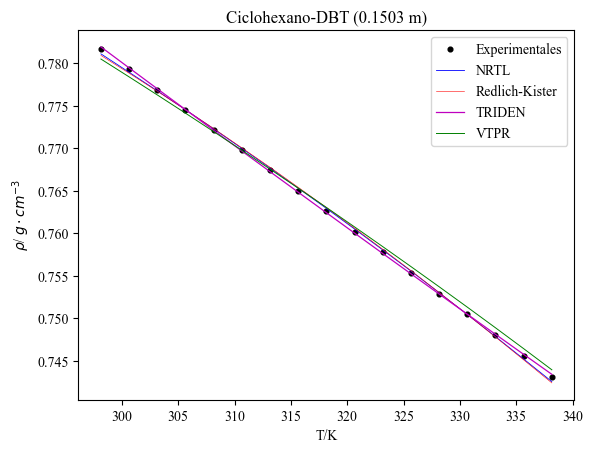

In [22]:
#New_df.to_excel("Tabla de Modelos densidad.xlsx")
TITULOS=["Ciclohexano-DBT (0.1503 m)","Tolueno-DBT (0.1373 m)","Benceno-DBT (0.1620 m)","n-Octano-DBT (0.1108 m)",
             "Ciclohexano-DBT (0.2277 m)","Tolueno-DBT (0.2080 m)","Benceno-DBT (0.2452 m)","n-Octano-DBT (0.1678 m)",
             "Ciclohexano-DBT (0.3044 m)","Tolueno-DBT (0.2785 m)" ,"Benceno-DBT (0.3284 m)","n-Octano-DBT (0.2247 m)"]  
Guardar=["Densidad_CH_DBT_C1.svg","Densidad_T_DBT_C1.svg","Densidad_B_DBT_C1.svg","Densidad_O_DBT_C1.svg",
         "Densidad_CH_DBT_C2.svg","Densidad_T_DBT_C2.svg","Densidad_B_DBT_C2.svg","Densidad_O_DBT_C2.svg",
         "Densidad_CH_DBT_C3.svg","Densidad_T_DBT_C3.svg","Densidad_B_DBT_C3.svg","Densidad_O_DBT_C3.svg",]

GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[0:17],New_df["D_RK"].values[0:17],
     New_df["D_NRTL"].values[0:17],New_df["D_TR"].values[0:17],New_df["D_VTPR"].values[0:17],TITULOS[0],Guardar[0])    

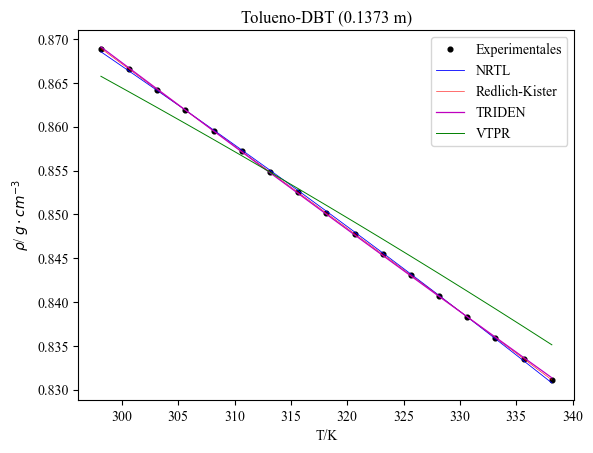

In [23]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[17:34],New_df["D_RK"].values[17:34],
     New_df["D_NRTL"].values[17:34],New_df["D_TR"].values[17:34],New_df["D_VTPR"].values[17:34],TITULOS[1],Guardar[1])    

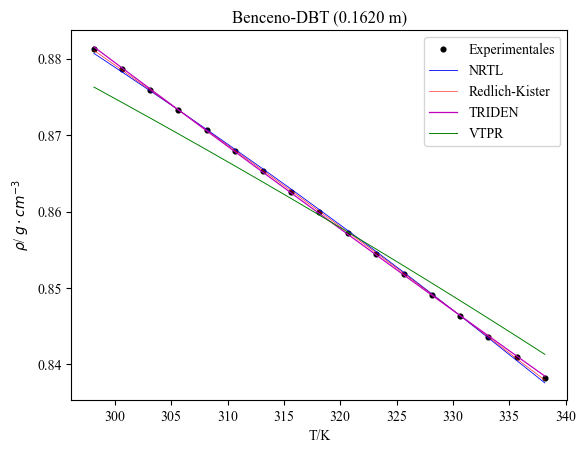

In [24]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[34:51],New_df["D_RK"].values[34:51],
     New_df["D_NRTL"].values[34:51],New_df["D_TR"].values[34:51],New_df["D_VTPR"].values[34:51],TITULOS[2],Guardar[2])    

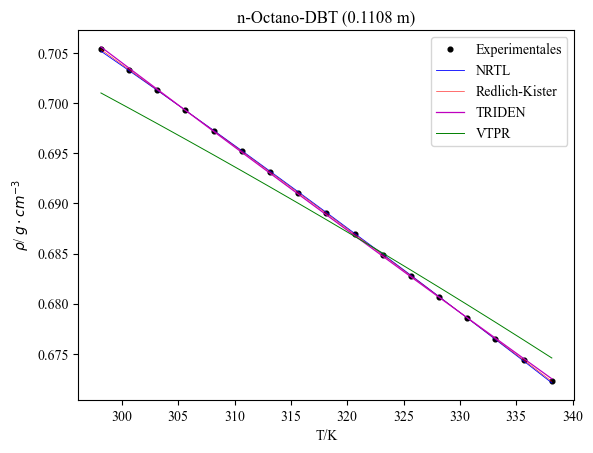

In [25]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[51:68],New_df["D_RK"].values[51:68],
     New_df["D_NRTL"].values[51:68],New_df["D_TR"].values[51:68],New_df["D_VTPR"].values[51:68],TITULOS[3],Guardar[3])    

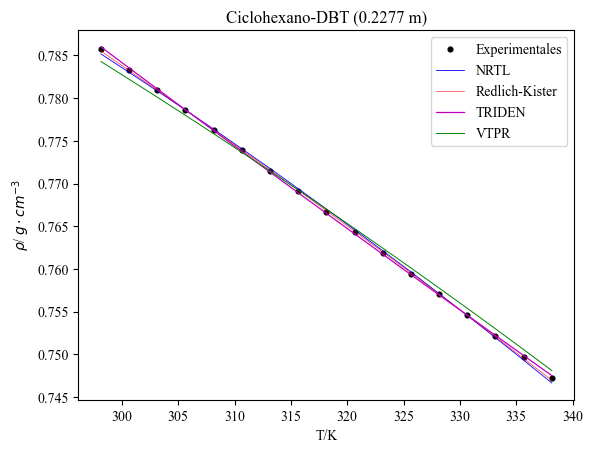

In [26]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[68:85],New_df["D_RK"].values[68:85],
     New_df["D_NRTL"].values[68:85],New_df["D_TR"].values[68:85],New_df["D_VTPR"].values[68:85],TITULOS[4],Guardar[4])    

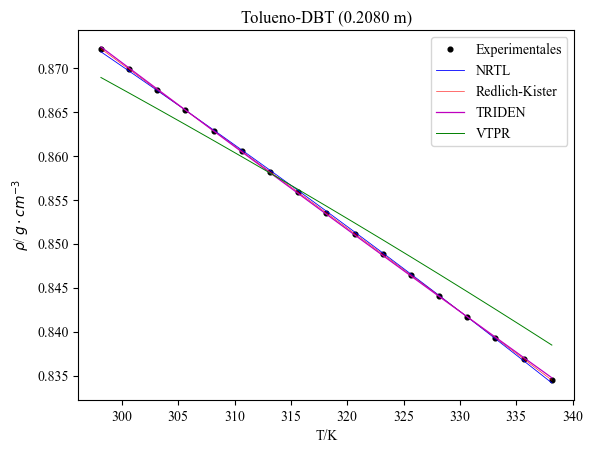

In [27]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[85:102],New_df["D_RK"].values[85:102],
     New_df["D_NRTL"].values[85:102],New_df["D_TR"].values[85:102],New_df["D_VTPR"].values[85:102],TITULOS[5],Guardar[5])    

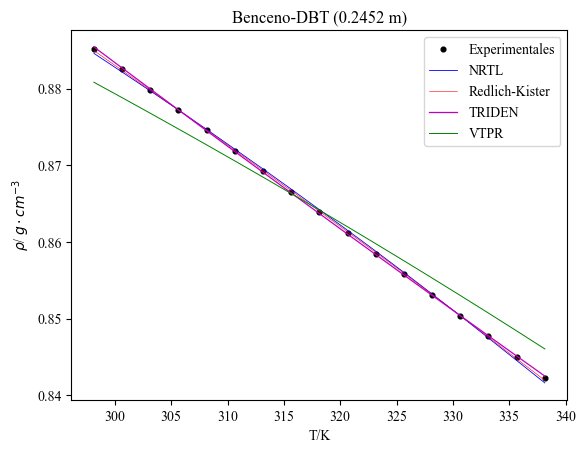

In [28]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[102:119],New_df["D_RK"].values[102:119],
     New_df["D_NRTL"].values[102:119],New_df["D_TR"].values[102:119],New_df["D_VTPR"].values[102:119],TITULOS[6],Guardar[6])    

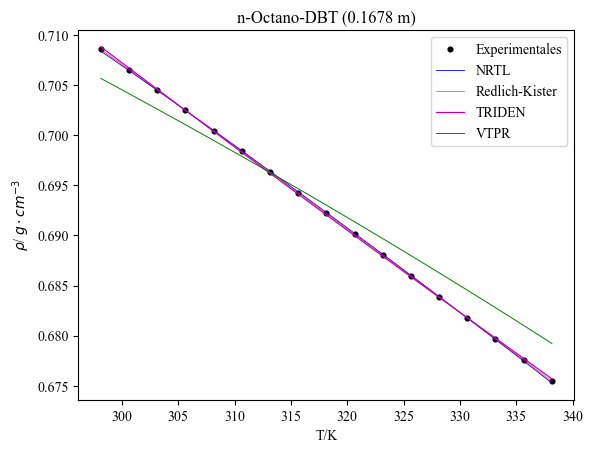

In [29]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[119:136],New_df["D_RK"].values[119:136],
     New_df["D_NRTL"].values[119:136],New_df["D_TR"].values[119:136],New_df["D_VTPR"].values[119:136],TITULOS[7],Guardar[7])    

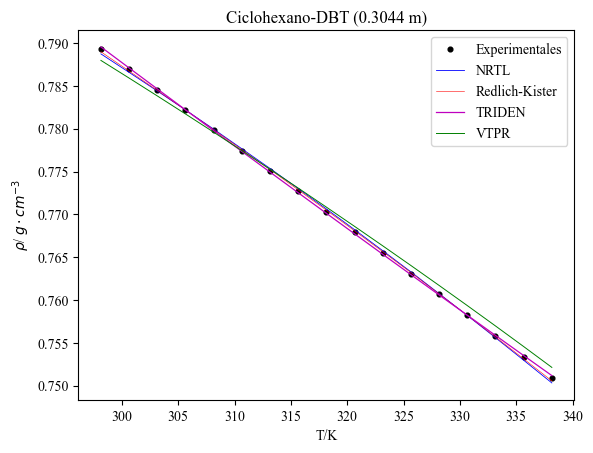

In [30]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[136:153],New_df["D_RK"].values[136:153],
     New_df["D_NRTL"].values[136:153],New_df["D_TR"].values[136:153],New_df["D_VTPR"].values[136:153],TITULOS[8],Guardar[8])    

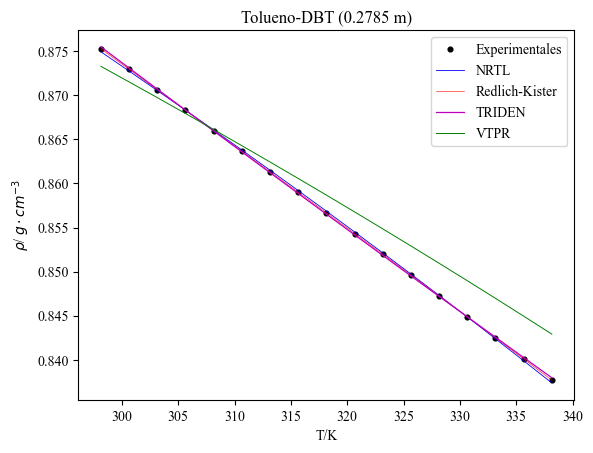

In [31]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[153:170],New_df["D_RK"].values[153:170],
     New_df["D_NRTL"].values[153:170],New_df["D_TR"].values[153:170],New_df["D_VTPR"].values[153:170],TITULOS[9],Guardar[9])    

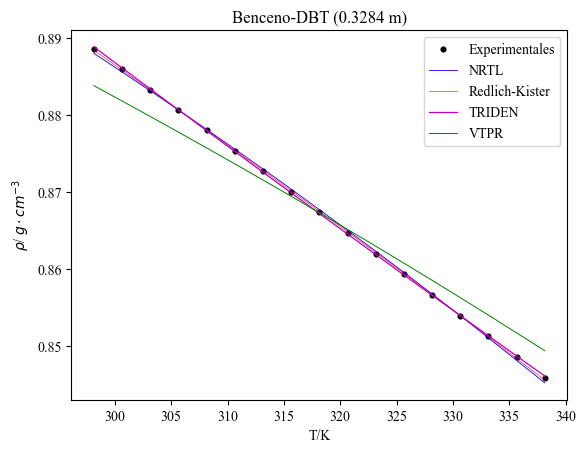

In [32]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[170:187],New_df["D_RK"].values[170:187],
     New_df["D_NRTL"].values[170:187],New_df["D_TR"].values[170:187],New_df["D_VTPR"].values[170:187],TITULOS[10],Guardar[10])    

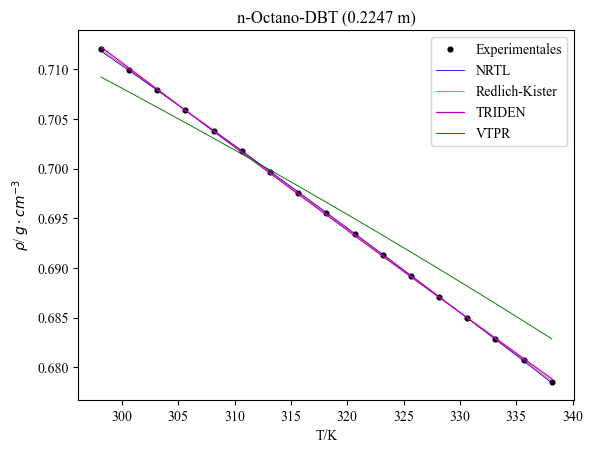

In [33]:
#[0, 17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187,204]
GCAS(DF_MIXTURES["T[K]"].to_numpy(dtype=float),
     New_df["Rho_exp"].values[187:204],New_df["D_RK"].values[187:204],
     New_df["D_NRTL"].values[187:204],New_df["D_TR"].values[187:204],New_df["D_VTPR"].values[187:204],TITULOS[11],Guardar[11])    

In [34]:
#Dataframe que tiene los ssres
DF_SSRES=pd.DataFrame(OPT_GLOBAL(V0,V1,V2,V3,COMPONENTS,DF_MIXTURES["T[K]"].to_numpy(dtype=float),DF_MIXTURES,XS,PMS,rho_puros)[1])
DF_SSRES.head()
#DF_SSRES.to_excel("SSRES models density.xlsx")

,MIX,SSRES_NRTL,SSRES_RK,SSRES_TR,SSRES_VTPR
0,MIX_C1CH,2.443372e-06,1.434530e-06,4.356530e-07,0.000008
1,MIX_C1T,2.716993e-09,6.188028e-07,2.255396e-07,0.000090
2,MIX_C1B,2.689816e-07,1.795766e-06,3.381564e-07,0.000112
3,MIX_C1O,3.276133e-09,1.501459e-07,2.667422e-07,0.000082
4,MIX_C2CH,2.287518e-07,1.421547e-06,4.394026e-07,0.000009


In [35]:
#Dataframe con los parámetros
DF_PARS=pd.DataFrame(OPT_GLOBAL(V0,V1,V2,V3,COMPONENTS,DF_MIXTURES["T[K]"].to_numpy(dtype=float),DF_MIXTURES,XS,PMS,rho_puros)[2])
DF_PARS.head()

,MIX,PAR_NRTL,PAR_RK,PAR_TR,PAR_VTPR
0,MIX_C1CH,"[-17.287213343772383, 0.7541755784734926, -209...","[6411.571580276725, -22.176132737900673, 560.0...","[0.02143491554826873, 0.13715782998862158, 407...","[-4.7374999999999915e-06, -5.624999999999959e-07]"
1,MIX_C1T,"[-18.26240154436587, 0.9077380796008755, -924....","[5763.680300872574, -1.9975845793458622, 402.7...","[0.020942188055157518, 0.13155591160514024, 44...","[-4.906249999999989e-06, 5.625000000000486e-08]"
2,MIX_C1B,"[-18.61153495258031, 2.405256718390973, -737.3...","[6048.37531759049, -30.069313316260985, 522.05...","[0.018470141103166714, 0.12010263847487102, 45...","[-4.099999999999999e-06, -2.6999999999999996e-06]"
3,MIX_C1O,"[-17.761516533207704, 1.1182555732768138, -878...","[5221.255280958878, -7.036094644275791, 403.31...","[0.023594818878279633, 0.15289498109659758, 56...","[-5.8102539062499725e-06, 4.775097656250012e-06]"
4,MIX_C2CH,"[-16.019589385132733, -0.3906890267731121, -11...","[4318.467792767672, -13.50522506397913, 251.22...","[0.01761271817797829, 0.12414571792692802, 425...","[-4.7374999999999915e-06, -5.624999999999959e-07]"


In [36]:
New_df2=pd.DataFrame()
New_df2["MIX"]=DF_PARS.explode("PAR_NRTL")["MIX"]
New_df2["PAR_NRTL"]=DF_PARS.explode("PAR_NRTL")["PAR_NRTL"]
New_df2.head()

,MIX,PAR_NRTL
0,MIX_C1CH,-17.287213
0,MIX_C1CH,0.754176
0,MIX_C1CH,-209.081588
0,MIX_C1CH,-348.239823
0,MIX_C1CH,0.1992


In [37]:
New_df3=pd.DataFrame()
New_df3["MIX"]=DF_PARS.explode("PAR_RK")["MIX"]
New_df3["PAR_RK"]=DF_PARS.explode("PAR_RK")["PAR_RK"]
New_df3.head()

,MIX,PAR_RK
0,MIX_C1CH,6411.57158
0,MIX_C1CH,-22.176133
0,MIX_C1CH,560.056997
0,MIX_C1CH,1761.561983
1,MIX_C1T,5763.680301


In [38]:
New_df4=pd.DataFrame()
New_df4["MIX"]=DF_PARS.explode("PAR_TR")["MIX"]
New_df4["PAR_TR"]=DF_PARS.explode("PAR_TR")["PAR_TR"]
New_df4.head()

,MIX,PAR_TR
0,MIX_C1CH,0.021435
0,MIX_C1CH,0.137158
0,MIX_C1CH,407.467977
0,MIX_C1CH,0.0622
0,MIX_C1CH,0.259006


In [39]:
New_df5=pd.DataFrame()
New_df5["MIX"]=DF_PARS.explode("PAR_VTPR")["MIX"]
New_df5["PAR_VTPR"]=DF_PARS.explode("PAR_VTPR")["PAR_VTPR"]
New_df5.head()

,MIX,PAR_VTPR
0,MIX_C1CH,-0.000005
0,MIX_C1CH,-0.000001
1,MIX_C1T,-0.000005
1,MIX_C1T,0.0
2,MIX_C1B,-0.000004


In [40]:
#Generar un excel de resumen de todos los modelos de viscosidad
LIST_SHEET=["Models_density_results","PAR_NRTL_for_model","PAR_RK_for_model","PAR_TR_for_model","PAR_VTPR_for_model","SSRES_models"]
mm_s=[New_df,New_df2,New_df3,New_df4,New_df5,DF_SSRES]
writer_m=pd.ExcelWriter("Tablas_de_Modelos_densidad_con_parS.xlsx",engine="xlsxwriter")
for i, df_ms in enumerate(mm_s):
    df_ms.to_excel(writer_m,sheet_name=LIST_SHEET[i],index=False)
writer_m.save()